In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("yellow_tripdata_2015-01.csv")
data.shape

(12748986, 19)

In [5]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-01-15 19:05:39,2015-01-15 19:23:42,1,1.59,-73.993896,40.750111,1,N,-73.974785,40.750618,1,12.0,1.0,0.5,3.25,0.0,0.3,17.05
1,1,2015-01-10 20:33:38,2015-01-10 20:53:28,1,3.30,-74.001648,40.724243,1,N,-73.994415,40.759109,1,14.5,0.5,0.5,2.00,0.0,0.3,17.80
2,1,2015-01-10 20:33:38,2015-01-10 20:43:41,1,1.80,-73.963341,40.802788,1,N,-73.951820,40.824413,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80
3,1,2015-01-10 20:33:39,2015-01-10 20:35:31,1,0.50,-74.009087,40.713818,1,N,-74.004326,40.719986,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80
4,1,2015-01-10 20:33:39,2015-01-10 20:52:58,1,3.00,-73.971176,40.762428,1,N,-74.004181,40.742653,2,15.0,0.5,0.5,0.00,0.0,0.3,16.30


In [6]:
data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    3
total_amount             0
dtype: int64

In [7]:
data = data.dropna(axis=0)
data.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
data.shape

(12748983, 19)

## 2.Pre-Processing

In [9]:
# Convert Y/N to 1/0
data['store_and_fwd_flag'] = LabelEncoder().fit_transform(data['store_and_fwd_flag'])

# Convert timestamp columns to datetime
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Extract features from timestamp columns (hour, day, month)
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month
data['dropoff_hour'] = data['tpep_dropoff_datetime'].dt.hour
data['dropoff_day'] = data['tpep_dropoff_datetime'].dt.day
data['dropoff_month'] = data['tpep_dropoff_datetime'].dt.month

# Drop unnecessary columns
data.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

# Standardize numerical features
numerical_features = ['trip_distance', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
data[numerical_features] = StandardScaler().fit_transform(data[numerical_features])

# Display the preprocessed data
data.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month
0,2,1,-0.001206,-0.141436,0.139331,1,0,-0.137039,0.136850,1,...,0.001262,-0.159444,0.243998,0.001755,19,15,1,19,15,1
1,1,1,-0.001032,-0.142201,0.134694,1,0,-0.139009,0.138398,1,...,0.000132,-0.159444,0.243998,0.002433,20,10,1,20,10,1
2,1,1,-0.001184,-0.138418,0.148773,1,0,-0.134735,0.150298,2,...,-0.001675,-0.159444,0.243998,-0.003894,20,10,1,20,10,1
3,1,1,-0.001316,-0.142936,0.132825,1,0,-0.140003,0.131268,2,...,-0.001675,-0.159444,0.243998,-0.009316,20,10,1,20,10,1
4,1,1,-0.001062,-0.139192,0.141539,1,0,-0.139989,0.135399,2,...,-0.001675,-0.159444,0.243998,0.001077,20,10,1,20,10,1


In [10]:
data.payment_type.value_counts()

payment_type
1    7881385
2    4816992
3      38632
4      11972
5          2
Name: count, dtype: int64

## Determine No of Clusters

In [11]:
data.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_hour', 'pickup_day',
       'pickup_month', 'dropoff_hour', 'dropoff_day', 'dropoff_month'],
      dtype='object')

In [12]:
data.shape

(12748983, 23)

In [13]:
# Select all features for clustering
features_for_clustering = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
                               'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
                               'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour', 'pickup_day',
       'pickup_month', 'dropoff_hour', 'dropoff_day', 'dropoff_month']
len(features_for_clustering)

19

In [13]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# Deciding no of clusters upon 10Lakhs Sample
X = data[features_for_clustering].sample(100000)

# Assuming 'data' is your pre-processed DataFrame
n_samples = len(X)
n_clusters_range = range(2, 11)  # Number of clusters range from 2 to 10

# Specify the number of chunks
n_chunks = 10
chunk_size = n_samples // n_chunks

# Placeholder for silhouette scores
silhouette_scores = []
inertia = []

# Loop through different cluster numbers
for n_clusters in n_clusters_range:
    # Initialize MiniBatchKMeans
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, n_init='auto', batch_size=10000)

    # Loop through chunks
    for i in range(n_chunks):
        # Determine start and end index for the chunk
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else n_samples

        # Extract the chunk
        chunk = X.iloc[start_idx:end_idx]


        # Partially fit the model on the chunk
        mbkmeans.partial_fit(chunk)


    # Predict clusters for all data points
    labels = mbkmeans.predict(X)

    # Inertia
    inertia.append(mbkmeans.inertia_)
    # Calculate silhouette score
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)
    print(f"Training for No of Clusters- {n_clusters} completed!!")

Training for No of Clusters- 2 completed!!
Training for No of Clusters- 3 completed!!
Training for No of Clusters- 4 completed!!
Training for No of Clusters- 5 completed!!
Training for No of Clusters- 6 completed!!
Training for No of Clusters- 7 completed!!
Training for No of Clusters- 8 completed!!
Training for No of Clusters- 9 completed!!
Training for No of Clusters- 10 completed!!


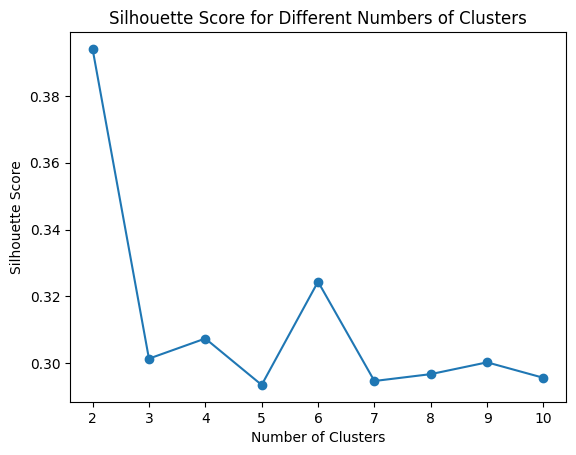

In [14]:
import matplotlib.pyplot as plt

# Plot the silhouette scores
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

* As per silhouette, No of Clusters = 2

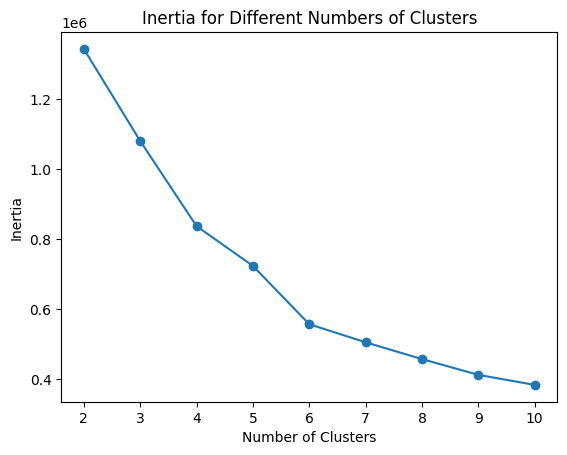

In [15]:
# Plot inertia vs No Of centroids
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia for Different Numbers of Clusters')
plt.show()

* As per Elbow method no of cluster: 5

In [16]:
inertia

[1342650.1243497925,
 1080144.8814797702,
 837273.0887155161,
 723819.9103224877,
 557560.8214970403,
 505983.6804908658,
 458040.2347107076,
 413110.17560726125,
 384415.7006585489]

In [17]:
silhouette_scores

[0.39411915932504865,
 0.3013109936933909,
 0.30734287206472494,
 0.293437871978408,
 0.3243686027504073,
 0.29461157789695225,
 0.2966718009610686,
 0.30020588576869306,
 0.29556087239578666]

## Now I am applying these values to whole data

In [14]:
# Taking optimal no of clusters as 5

X = data[features_for_clustering]

n_samples = len(X)

# Specify the number of chunks
n_chunks = 10
chunk_size = n_samples // n_chunks

# Initialize MiniBatchKMeans
mbkmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init='auto', batch_size=chunk_size)

# Loop through chunks
for i in range(n_chunks):
    # Determine start and end index for the chunk
    start_idx = i * chunk_size
    end_idx = (i + 1) * chunk_size if i < n_chunks - 1 else n_samples

    # Extract the chunk
    chunk = X.iloc[start_idx:end_idx]

    # Partially fit the model on the chunk
    mbkmeans.partial_fit(chunk)

# Predict clusters for all data points
data['labels'] = mbkmeans.predict(X)

In [15]:
data['labels'].value_counts()

labels
0    3399504
2    3021880
4    2428520
3    2031637
1    1867442
Name: count, dtype: int64

In [16]:
data.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month,labels
0,2,1,-0.001206,-0.141436,0.139331,1,0,-0.137039,0.136850,1,...,-0.159444,0.243998,0.001755,19,15,1,19,15,1,0
1,1,1,-0.001032,-0.142201,0.134694,1,0,-0.139009,0.138398,1,...,-0.159444,0.243998,0.002433,20,10,1,20,10,1,0
2,1,1,-0.001184,-0.138418,0.148773,1,0,-0.134735,0.150298,2,...,-0.159444,0.243998,-0.003894,20,10,1,20,10,1,0
3,1,1,-0.001316,-0.142936,0.132825,1,0,-0.140003,0.131268,2,...,-0.159444,0.243998,-0.009316,20,10,1,20,10,1,0
4,1,1,-0.001062,-0.139192,0.141539,1,0,-0.139989,0.135399,2,...,-0.159444,0.243998,0.001077,20,10,1,20,10,1,0


In [17]:
data.shape

(12748983, 24)

In [18]:
print(features_for_clustering)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour', 'pickup_day', 'pickup_month', 'dropoff_hour', 'dropoff_day', 'dropoff_month']


In [19]:
len(features_for_clustering)

19

## For plotting

In [20]:
data1 = data.copy()
data1.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,dropoff_hour,dropoff_day,dropoff_month,labels
0,2,1,-0.001206,-0.141436,0.139331,1,0,-0.137039,0.136850,1,...,-0.159444,0.243998,0.001755,19,15,1,19,15,1,0
1,1,1,-0.001032,-0.142201,0.134694,1,0,-0.139009,0.138398,1,...,-0.159444,0.243998,0.002433,20,10,1,20,10,1,0
2,1,1,-0.001184,-0.138418,0.148773,1,0,-0.134735,0.150298,2,...,-0.159444,0.243998,-0.003894,20,10,1,20,10,1,0
3,1,1,-0.001316,-0.142936,0.132825,1,0,-0.140003,0.131268,2,...,-0.159444,0.243998,-0.009316,20,10,1,20,10,1,0
4,1,1,-0.001062,-0.139192,0.141539,1,0,-0.139989,0.135399,2,...,-0.159444,0.243998,0.001077,20,10,1,20,10,1,0


In [29]:
print(np.unique(data1['labels']))

[0 1 2 3 4]


In [30]:
print('Data column with null value:\n',data1.isnull().sum())

Data column with null value:
 VendorID                 0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
pickup_hour              0
pickup_day               0
pickup_month             0
dropoff_hour             0
dropoff_day              0
dropoff_month            0
labels                   0
dtype: int64


In [35]:
X = data[features_for_clustering].values
y_kmeans = data['labels'].values

In [36]:
X

array([[-0.14143561,  0.13933069, -0.13703912, ..., 19.        ,
        15.        ,  1.        ],
       [-0.14220118,  0.13469383, -0.13900887, ..., 20.        ,
        10.        ,  1.        ],
       [-0.13841777,  0.14877331, -0.13473483, ..., 20.        ,
        10.        ,  1.        ],
       ...,
       [-0.13999639,  0.13923017, -0.13646879, ..., 19.        ,
        10.        ,  1.        ],
       [-0.14199547,  0.13724646, -0.13774495, ..., 19.        ,
        10.        ,  1.        ],
       [-0.13812239,  0.14225053, -0.13642286, ..., 19.        ,
        10.        ,  1.        ]])

In [37]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [48]:
len(X[y_kmeans == 0, 0])

3399504

In [38]:
print(X[y_kmeans == 0, 0])

[-0.14143561 -0.14220118 -0.13841777 ... -0.13999639 -0.14199547
 -0.13812239]


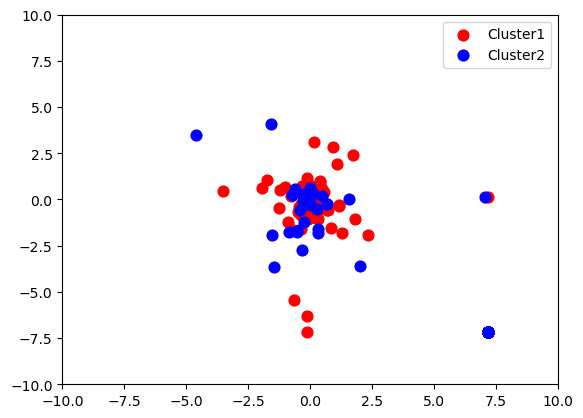

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
# plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
# plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'yellow', label = 'Cluster4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'tab:orange', label = 'Cluster5')
# plt.legend()
# plt.title("IPL Batsman")
# plt.xlabel("average")
# plt.ylabel("strike rate")
plt.legend()
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.show()